In [1]:
!pip install -U matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 45.0 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.8.0
    Uninstalling matplotlib-3.8.0:
      Successfully uninstalled matplotlib-3.8.0


In [22]:

# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from statsmodels.graphics.mosaicplot import mosaic



In [5]:
df = pd.read_csv("mcdonalds_dataset.csv")
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [6]:
df.shape

(1453, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [8]:
# getting the value counts of 'Like'
df['Like'].value_counts()

,count
Like,
+3,229
+2,187
0,169
+4,160
+1,152
I hate it!-5,152
I love it!+5,143
-3,73
-4,71


In [ ]:
# getting the value counts of 'Age'
df['Age'].value_counts()

In [ ]:
# getting the value counts of 'VisitFrequency'
df['VisitFrequency'].value_counts()

,count
VisitFrequency,
Once a month,439
Every three months,342
Once a year,252
Once a week,235
Never,131
More than once a week,54


In [9]:
MD_x = df.iloc[:, 0:11].values  # Select columns 1 to 11 as a NumPy array
MD_x = (MD_x == "Yes").astype(int)     # Convert "Yes" to 1 and other values to 0
col_means = np.round(MD_x.mean(axis=0), 2)  # Compute column means and round to 2 decimals

print(col_means)

[0.55 0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]


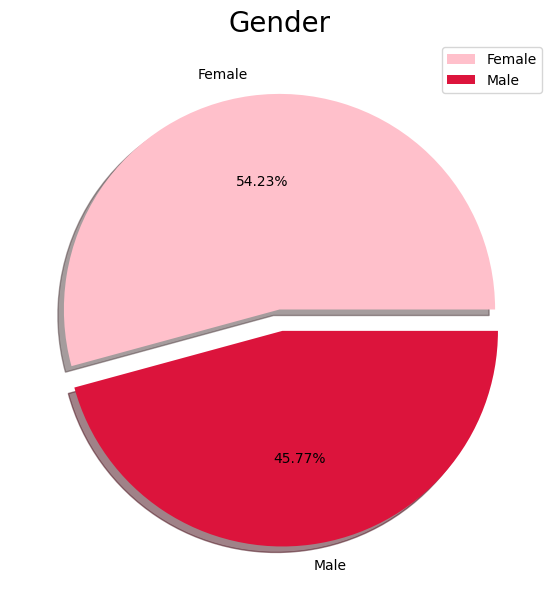

<ipython-input-10-fe8cde3f93fc>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  data = sns.countplot(x=df['Age'], palette = 'viridis')


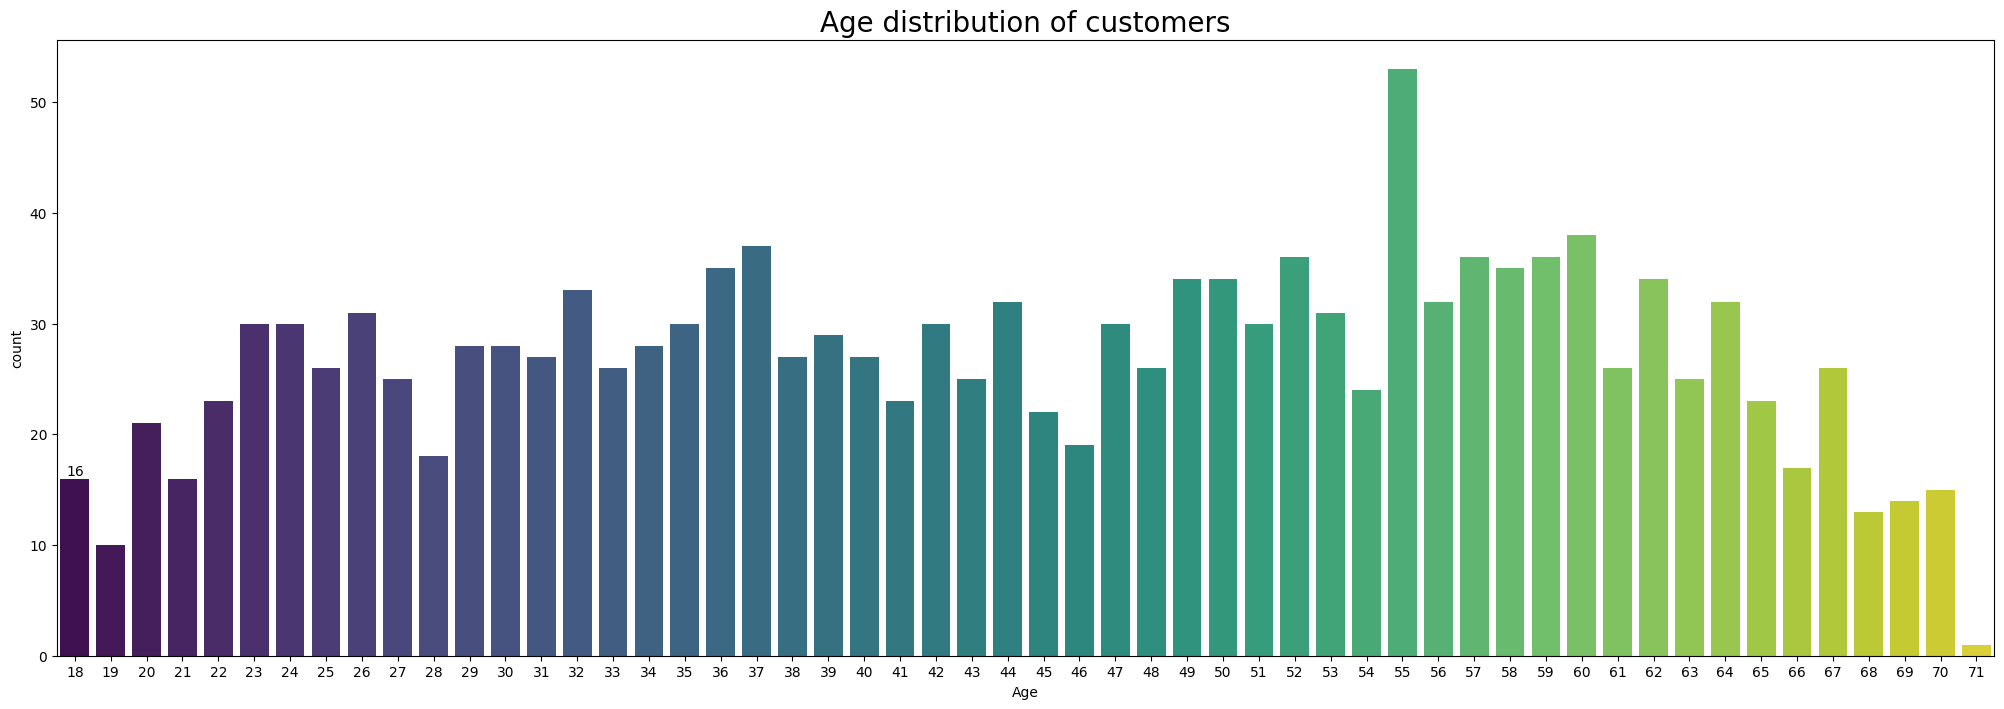

In [10]:

# Demographic segmentation using 'Age' & 'Gender'

# Gender: we infer that there are more female customers than male
labels = ['Female', 'Male']
size = df['Gender'].value_counts()
colors = ['pink', 'crimson']
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

# Age: Mcdonalds recieve more customers of age between 50-60 and 35-40
plt.rcParams['figure.figsize'] = (25, 8)
data = sns.countplot(x=df['Age'], palette = 'viridis')
data.bar_label(data.containers[0])
plt.title('Age distribution of customers', fontsize = 20)
plt.show()

In [11]:
# columns other than Like, Age, VisitFrequency, Gender are having binary features in the form of Yes/No only.
# so we will perform 'label encoding' for further model building
df_new = df.drop(labels=['Like','Age','VisitFrequency','Gender'], axis=1)

In [12]:
df_new.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No


In [13]:
# LabelEncoder will map 'Yes' to 1 and 'No' to 0
df_encoded = df_new.apply(LabelEncoder().fit_transform)
df_encoded.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


Applying PCA

In [14]:
# applying scaling and PCA
pca_data = preprocessing.scale(df_encoded)
pca = PCA(n_components=11)
pc = pca.fit_transform(pca_data)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pf = pd.DataFrame(data = pc, columns = names)
pf.head()


,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,-0.704334,0.437016,-0.268698,-0.872074,1.521184,-0.470160,0.030969,0.687116,-0.367598,-0.321161,1.701170
1,0.467820,-0.364277,1.596835,-0.004835,-0.462385,0.449321,-0.087351,-0.446003,-0.221855,-0.191268,1.467681
2,-0.191986,-1.712949,0.339413,3.368168,1.266802,-0.148058,0.606634,0.668576,-1.377226,1.259300,-0.128530
3,0.116991,1.155122,1.003913,0.469589,-1.141750,0.857182,-0.015843,-0.390275,1.578539,-0.092189,-0.233201
4,0.034724,1.390267,-0.792275,0.473031,0.270488,0.847963,1.804085,0.700019,-1.630339,-0.092449,-0.033144


In [15]:
# variance (from PC1 to PC11)
pca.explained_variance_ratio_

array([0.25556637, 0.14834762, 0.12546909, 0.09826971, 0.08348356,
       0.07109102, 0.06498559, 0.05384477, 0.04762809, 0.02796379,
       0.0233504 ])

In [33]:
# correlation coefficient between original variables and the component
loadings = pca.components_
num_pc = pca.n_features_in_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['feature'] = df_encoded.columns.values
loadings_df = loadings_df.set_index('feature')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
feature,,,,,,,,,,,
yummy,0.406955,-0.282615,0.259588,0.026237,-0.346857,0.124916,-0.159878,-0.016587,0.195341,-0.691446,-0.091851
convenient,0.308827,0.045682,0.317151,-0.009424,0.437148,-0.188966,0.661814,-0.150033,0.336539,-0.028831,0.021460
spicy,0.023320,-0.069982,-0.020170,0.845496,0.185551,-0.438661,-0.214188,0.027835,-0.025239,-0.058187,-0.041960
fattening,-0.177861,0.205590,0.608077,-0.023396,-0.086934,-0.107520,0.023851,0.720478,-0.105052,0.020311,-0.074626
greasy,-0.267796,0.136300,0.389568,0.330854,-0.343713,0.278329,0.307300,-0.487275,-0.346137,0.015160,-0.031047
fast,0.213039,0.282441,0.211395,0.090363,0.568939,0.572734,-0.392436,-0.055976,-0.099235,-0.017917,-0.054448
cheap,0.289134,0.575032,-0.125157,0.114477,-0.256981,-0.020657,0.008895,0.064667,0.062027,-0.060323,0.691923
tasty,0.426115,-0.242199,0.269648,0.072691,-0.286099,0.053053,-0.197364,-0.059289,0.213587,0.713426,0.006426
expensive,-0.290944,-0.567528,0.183298,0.035510,0.207362,0.171160,-0.015198,0.061727,0.009675,-0.029581,0.693614


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


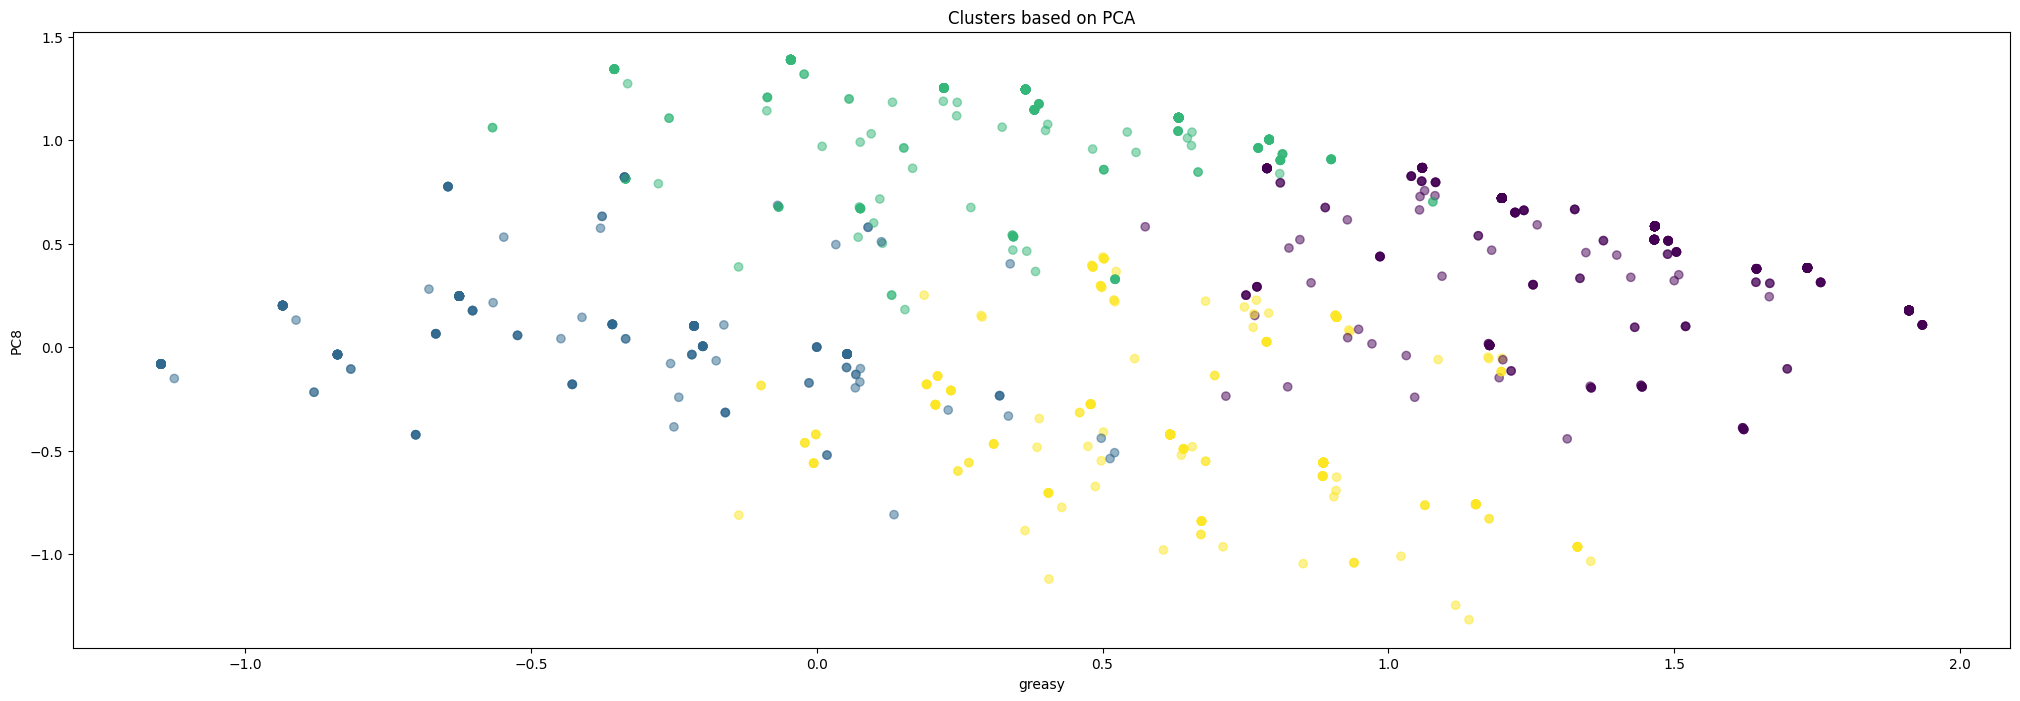

In [37]:
kmeans = KMeans(n_clusters=4, random_state=1234)
clusters = kmeans.fit_predict(df_encoded)
df['Cluster'] = clusters

# Visualize clusters using the first two principal components
pca_data = pca.transform(df_encoded)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.xlabel('greasy')
plt.ylabel('PC8')
plt.title('Clusters based on PCA')
plt.show()

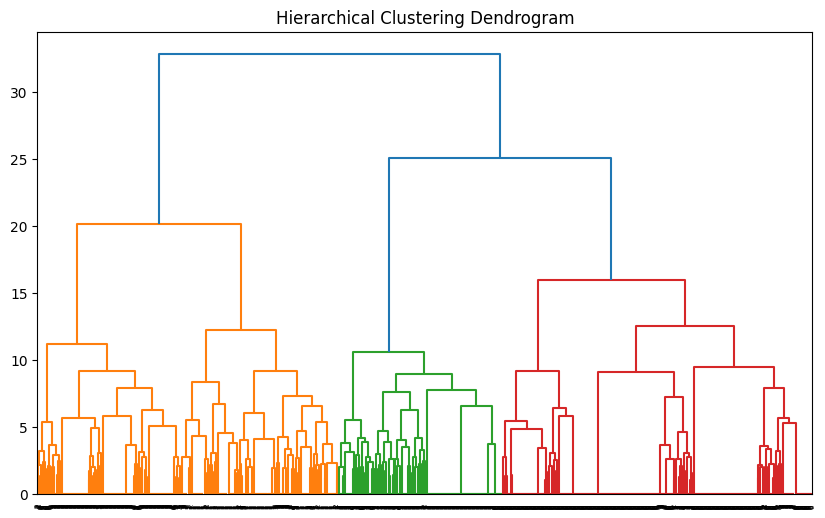

In [26]:
linkage_matrix = linkage(df_encoded, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=clusters)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()